this is for reading the columns of entropy and add entropy of all atoms together in each frame to have the total entropy in that frame

In [ ]:
import math
import collections

import numpy as np
import pandas as pd
import matplotlib.pyplot as pp

%matplotlib inline

In [ ]:
#read all parameters of header
timeSteps=[]
boxDim=[]
l=[]
num_frame=0
#with open(r'C:\bloodProject\NP\5937beads\np2.dat') as fp:   # to read lines if atomlist after "Atoms"
#with open('/content/drive/My Drive/Case/nanoBloodProject/MSD/16rc/janus8rcNp/EG-lig118.1/nvt2') as fp:
with open(r'C:\vmd\dumpN.lammpstrj') as fp:

        for line in fp:
            if 'ITEM: TIMESTEP' in line:                                         
                for line in fp: # now you are at the lines you want
                    if 'ITEM: NUMBER OF ATOMS' in line: 
                     break 
                   
                    line=line.rstrip()# to remove any white spaces at the end of the string                  
                    #
                    timeSteps.append(line)# add the string in to the list
                    num_frame+=1
                    

            if 'ITEM: NUMBER OF ATOMS' in line:                                         
                for line in fp: # now you are at the lines you want
                    if 'ITEM: BOX BOUNDS' in line: 
                     break 
                   
                    line=line.rstrip()# to remove any white spaces at the end of the string                  
                    #
                    num_atom=int(line)  

            if 'ITEM: BOX BOUNDS' in line:                                         
                for line in fp: # now you are at the lines you want
                    if 'ITEM: ATOMS' in line: 
                     break 
  
                       
                    line = line.split()
                    boxDim.append(line[:])

In [ ]:
#read coordinate part
time_counter=0
lines=[]

#df.loc[:,'x'] = df.loc[:,'x'].astype(float)
#with open('/content/drive/My Drive/Case/nanoBloodProject/MSD/16rc/janus8rcNp/EG-lig118.1/nvt2') as fp:
#with open('/content/drive/My Drive/Case/nanoBloodProject/MSD/16rc/homo8rcNp/nvt') as fp:
with open(r'C:\vmd\dumpN.lammpstrj') as fp:  
       
       for line in fp:
            atom_counter=0
            
            if 'ITEM: ATOMS' in line:
                time_counter+=1                                         
                
                for line in fp: # now you are at the lines you want
                    atom_counter+=1

                    #x(time_counter,atom_counter)=df.loc[line,'x'] 
                                        
                    if 'ITEM: TIMESTEP' in line: 
                     break 
                    
                    
                    line=line.rstrip()# to remove any white spaces at the end of the string                  
                    lines.append(line)# add the string in to the list
                    #lines[time_counter][atom_counter]=line# add the string in to the list
                    #print(line)
                    

In [ ]:
num_frame


31

In [ ]:
#remove empty lines from the list
while("" in lines) : 
    lines.remove("") 

In [ ]:
#data frame for the whole dump file without separating by frame
df=pd.DataFrame(lines, columns=['atomType']) # to make a data frame of pandas from the list and put atomID name on the column
df[['atomType','atomID','entropy']] = df.atomType.str.split(expand=True,) # to split one column to multiple columns and allocate name for each column
df

,atomType,atomID,entropy
0,6,155853,-nan
1,6,155872,-nan
2,6,155890,-0.0487274
3,6,156166,-nan
4,6,156185,-0.0715752
...,...,...,...
24981,6,156497,-nan
24982,6,156828,-nan
24983,6,157141,-nan
24984,6,156534,-nan


# very important: to read all lines in the entire dump file( all the lines of all the frames)

In [ ]:
entropy_Frame=np.zeros((num_frame,num_atom))

for i in range (0, num_frame):
   
   entropy_Frame[i,:]=df.entropy.values[(i*num_atom):((i*num_atom)+num_atom)] #thankGOD! to read x values for each frame and put in an array

In [ ]:
#put the entropy of atoms in a 2D array
entropy=np.zeros((num_frame,num_atom))
for i in range (0, num_frame):
    #print("frame",i)
    for j in range (0, num_atom):
        entropy_Frame[np.isnan(entropy_Frame)] = 0 #thankGOD! to convert NaN values of entropy to 0
        
        if entropy_Frame[i,j] != 0:
            entropy[i,j]=entropy_Frame[i,j]           
            #print (i,j,entropy[i,j])

In [ ]:
#put the entropy of atoms in a 2D array and calc sum of the entropy of all of the atoms in each frame ThankGOD!
entropy=np.zeros((num_frame,num_atom))
sum_entropy_final=np.zeros((num_frame+1))

for i in range (0, num_frame):
    sum_entropy=np.zeros((num_frame+1))
    #print("frame",i)
    
    for j in range (0, num_atom):
        entropy_Frame[np.isnan(entropy_Frame)] = 0 #thankGOD! to convert NaN values of entropy to 0
        
        if entropy_Frame[i,j] != 0:
            entropy[i,j]=entropy_Frame[i,j]           
            #print (i,j,entropy[i,j])
            sum_entropy[i] +=entropy[i,j]
            
    #print(sum_entropy[i])
    sum_entropy_final[i] = sum_entropy[i]

----------------------------------------------------------------------------------

In [ ]:
#for i in range (0, num_frame):
    #print(i,sum_entropy_final[i])
df = pd.DataFrame(sum_entropy_final)
df.to_excel(r'C:\vmd\entropy.xlsx')

#thankGOD! correct units 

# thankGOD! final correct units 

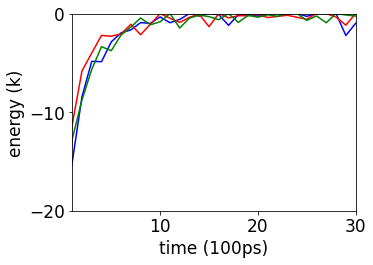

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import pylab 
from matplotlib import rcParams

df =pd.ExcelFile(r'C:\vmd\entropyRecep_rc1.0_8,12,16rcDisc_sigma0.1.xlsx')# the name of execl file should start with capital word. Rdf is correct but not rdf 
Sheet1 =pd.read_excel(df,header=0)

ax=Sheet1.plot(kind='line', y= '8rc', color='blue', linewidth=1.5, label='8rc')
ax.legend()
Sheet1.plot(kind='line',   y= '12rc', color='red', linewidth=1.5, label='12rc', ax=ax)
#ax=Sheet1.plot(kind='line',   y= 'perpend', color='red', linewidth=0.9, label='perpend')
#ax.legend()
Sheet1.plot(kind='line',   y= '16rc', color='green', linewidth=1.5, label='16rc', ax=ax)
ax.legend()

##########################################
ax.set_xlabel('time (100ps)')
ax.set_ylabel('energy (k)') 
#ax.set_yscale('log') #to plot in log scale

pylab.xlim([1,30])
plt.xticks(np.arange(10,31,10)) #the distance of units to be shown in x axis. it starts from 10 to 30 with idistance of 10.thankGOD!
pylab.ylim([-20,0.0])# define the range of y coordinate
plt.yticks(np.arange(-20,0.1,10))

rcParams['font.family'] = 'serif'
rcParams['font.sans-serif'] = ['Bitstream Vera Sans']
rcParams['font.serif'] = ['Bitstream Vera Sans']
rcParams["font.size"] = "17"

ax.get_legend().remove()

plt.rcParams["figure.figsize"] = [5.50, 4.0]
plt.rcParams["figure.autolayout"] = True

plt.ticklabel_format(axis="both", style="plain", scilimits=(0,0))#show the x and y axis in scientific 
###########################################

plt.savefig(r'C:\vmd\entropyRecep_rc1.0_8,12,16rcDisc_sigma0.1(2).png')

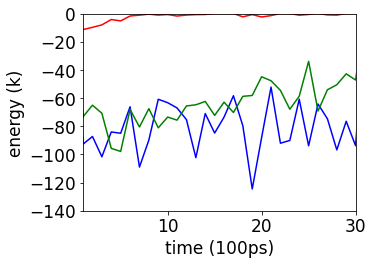

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import pylab 

df =pd.ExcelFile(r'C:\vmd\entropyN_rc1.0_12rc_bare_rod,disc,sphere_sigma0.1.xlsx')# the name of execl file should start with capital word. Rdf is correct but not rdf 
Sheet1 =pd.read_excel(df,header=0)

ax=Sheet1.plot(kind='line', y= 'rod', color='blue', linewidth=1.5, label='rod')
ax.legend()
Sheet1.plot(kind='line',  y= 'disc', color='red', linewidth=1.5, label='disc', ax=ax)
Sheet1.plot(kind='line',  y= 'sphere', color='green', linewidth=1.5, label='sphere', ax=ax)
ax.legend()


###########################################
ax.set_xlabel('time (100ps)')
ax.set_ylabel('energy (k)') 
#ax.set_yscale('log') #to plot in log scale

pylab.xlim([1,30])
plt.xticks(np.arange(10,31,10)) #the distance of units to be shown in x axis. it starts from 10 to 30 with idistance of 10.thankGOD!
pylab.ylim([-140,0.0])# define the range of y coordinate
plt.yticks(np.arange(-140,0.1,20))

rcParams['font.family'] = 'serif'
rcParams['font.sans-serif'] = ['Bitstream Vera Sans']
rcParams['font.serif'] = ['Bitstream Vera Sans']
rcParams["font.size"] = "17"

ax.get_legend().remove()

plt.rcParams["figure.figsize"] = [5.50, 4.0]
plt.rcParams["figure.autolayout"] = True

plt.ticklabel_format(axis="both", style="plain", scilimits=(0,0))#show the x and y axis in scientific mode
###########################################


plt.savefig(r'C:\vmd\entropyN_rc1.0_12rc_bare_rod,disc,sphere_sigma0.1(2).png')

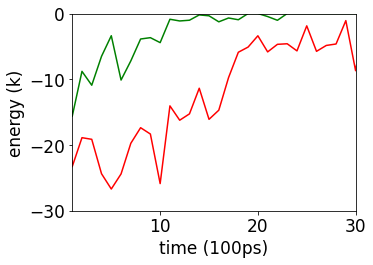

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import pylab 
from matplotlib import rcParams
import matplotlib

df =pd.ExcelFile(r'C:\vmd\entropyN_perpend,parallel.xlsx')# the name of execl file should start with capital word. Rdf is correct but not rdf 
Sheet1 =pd.read_excel(df,header=0)

ax=Sheet1.plot(kind='line', y= 'perpend', color='red', linewidth=1.5, label='perpendicular')
ax.legend()
#Sheet1.plot(kind='line', y= '45degree', color='red', linewidth=1.5, label='45˚', ax=ax)

#ax=Sheet1.plot(kind='line', y= '45degree', color='red', linewidth=0.5, label='45degree')
#ax.legend()

#Sheet1.plot(kind='line', y= '(-)45degree', color='green', linewidth=1.5, label='135˚', ax=ax)
#Sheet1.plot(kind='line', y= '(-)perpend', color='orange', linewidth=1.5, label='180˚', ax=ax)
Sheet1.plot(kind='line', y= 'parallel', color='green', linewidth=1.5, label='parallel', ax=ax)
ax.legend()

##########################################
ax.set_xlabel('time (100ps)')
ax.set_ylabel('energy (k)') 
#ax.set_yscale('log') #to plot in log scale

pylab.xlim([1,30])
plt.xticks(np.arange(10,31,10)) #the distance of units to be shown in x axis. it starts from 10 to 30 with idistance of 10.thankGOD!
pylab.ylim([-30,0.0])# define the range of y coordinate
plt.yticks(np.arange(-30,0.1,10))

rcParams['font.family'] = 'serif'
rcParams['font.sans-serif'] = ['Bitstream Vera Sans']
rcParams['font.serif'] = ['Bitstream Vera Sans']
rcParams["font.size"] = "17"

ax.get_legend().remove()

plt.rcParams["figure.figsize"] = [5.50, 4.0]
plt.rcParams["figure.autolayout"] = True

plt.ticklabel_format(axis="both", style="plain", scilimits=(0,0))#show the x and y axis in scientific 
###########################################

plt.savefig(r'C:\vmd\entropyN_perpend,parallel(3).png')

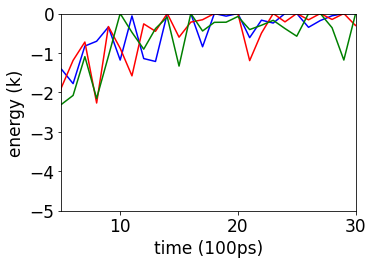

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import pylab 

df =pd.ExcelFile(r'C:\vmd\entropyRecep_bare_170_340lig.xlsx')# the name of execl file should start with capital word. Rdf is correct but not rdf 
Sheet1 =pd.read_excel(df,header=0)

ax=Sheet1.plot(kind='line', y= 'bare', color='blue', linewidth=1.5, label='bare')
ax.legend()
Sheet1.plot(kind='line',  y= '170 lig', color='red', linewidth=1.5, label='170 lig', ax=ax)
Sheet1.plot(kind='line',  y= '340 lig', color='green', linewidth=1.5, label='340 lig', ax=ax)
ax.legend()


###########################################
ax.set_xlabel('time (100ps)')
ax.set_ylabel('energy (k)') 
#ax.set_yscale('log') #to plot in log scale

pylab.xlim([5,30])
plt.xticks(np.arange(10,31,10)) #the distance of units to be shown in x axis. it starts from 10 to 30 with idistance of 10.thankGOD!
pylab.ylim([-5,0.0])# define the range of y coordinate
plt.yticks(np.arange(-5,0.1,1))

rcParams['font.family'] = 'serif'
rcParams['font.sans-serif'] = ['Bitstream Vera Sans']
rcParams['font.serif'] = ['Bitstream Vera Sans']
rcParams["font.size"] = "17"

ax.get_legend().remove()

plt.rcParams["figure.figsize"] = [5.50, 4.0]
plt.rcParams["figure.autolayout"] = True

plt.ticklabel_format(axis="both", style="plain", scilimits=(0,0))#show the x and y axis in scientific mode
###########################################


plt.savefig(r'C:\vmd\entropyRecep_bare_170_340lig(2).png')

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import pylab 

df =pd.ExcelFile(r'C:\vmd\pot_energy_12rc_bare.xlsx')# the name of execl file should start with capital word. Rdf is correct but not rdf 
Sheet1 =pd.read_excel(df,header=0)

ax=Sheet1.plot(kind='line', y= 'rod', color='blue', linewidth=1.5, label='rod')
ax.legend()
Sheet1.plot(kind='line',  y= 'disc', color='red', linewidth=1.5, label='disc', ax=ax)
Sheet1.plot(kind='line',  y= 'sphere', color='green', linewidth=1.5, label='sphere', ax=ax)
ax.legend()


###########################################
ax.set_xlabel('time (100ps)')
ax.set_ylabel('energy (k)') 
#ax.set_yscale('log') #to plot in log scale

pylab.xlim([1,30])
plt.xticks(np.arange(10,31,10)) #the distance of units to be shown in x axis. it starts from 10 to 30 with idistance of 10.thankGOD!
pylab.ylim([-140,0.0])# define the range of y coordinate
plt.yticks(np.arange(-140,0.1,20))

rcParams['font.family'] = 'serif'
rcParams['font.sans-serif'] = ['Bitstream Vera Sans']
rcParams['font.serif'] = ['Bitstream Vera Sans']
rcParams["font.size"] = "17"

ax.get_legend().remove()

plt.rcParams["figure.figsize"] = [5.50, 4.0]
plt.rcParams["figure.autolayout"] = True

plt.ticklabel_format(axis="both", style="plain", scilimits=(0,0))#show the x and y axis in scientific mode
###########################################


plt.savefig(r'C:\vmd\entropyN_rc1.0_12rc_bare_rod,disc,sphere_sigma0.1(2).png')